In [1]:
import sys
sys.path.append('../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42]

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.TremorModelTrainer(config, subject="Hunmin")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../Results/Baseline_results_train_with_{K}data_H.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/54 - Session Exp_2025-05-27/E8331D05289A/
(8539, 4, 14, 1) (8539,) (86, 4, 14, 1) (86,)
Dataset 2/54 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 90.03%
Maximum validation accuracy : 97.67%
Accuracy of test dataset using model V0: 97.6744%
Dataset 3/54 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 80.9036%
Dataset 4/54 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 86.2185%
Dataset 5/54 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Accuracy on unseen dataset: 83.2835%
Dataset 6/54 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Accuracy on unseen dataset: 69.6791%
Dataset 7/54 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Accuracy on unseen dataset: 75.3900%
Dataset 8/54 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Accuracy on unseen dataset: 78.1818%
Dataset 9/54 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Accuracy on unseen dataset: 73.4658%
Dataset 10/54

In [3]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '6', '10', '14', '18', '22', '26', '30', '34', '38', '42']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Baseline_results_train_with_{K}data_H.csv')

SUBJECT = "Hunmin"


Dataset 1/54 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.39%
Maximum validation accuracy : 92.97%

Dataset 2/54 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.08%
Maximum validation accuracy : 88.8%

Dataset 3/54 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.17%
Maximum validation accuracy : 92.04%

Dataset 4/54 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.95%
Maximum validation accuracy : 91.94%

Dataset 5/54 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.48%
Maximum validation accur

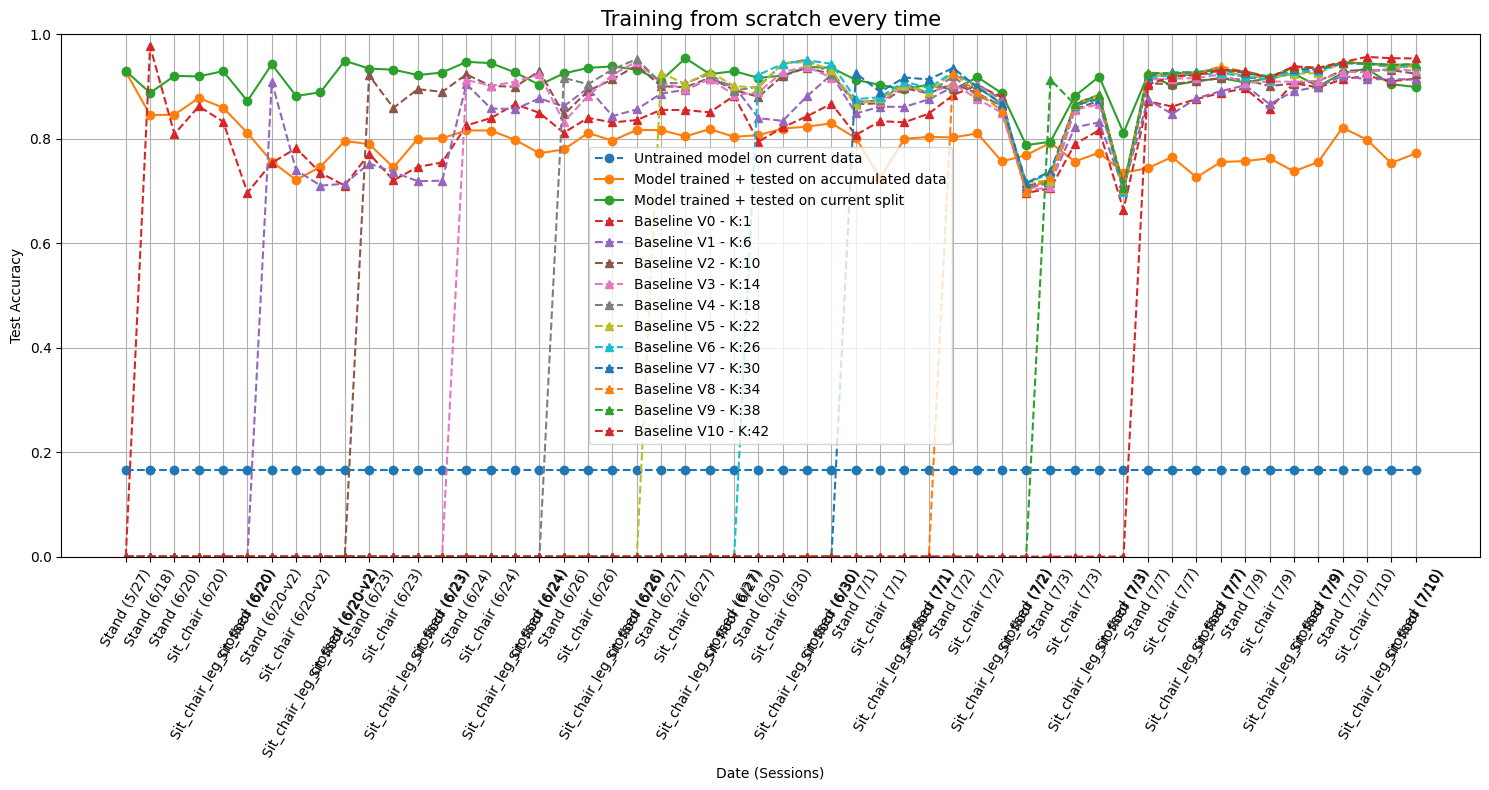

Average of acc without training anything (should be random): 15.47%
Average of acc using previous test data after training: 91.10%
Average of acc using current test data after training: 79.13%
Baseline K-1: 83.01%
Baseline K-6: 84.69%
Baseline K-10: 88.89%
Baseline K-14: 88.81%
Baseline K-18: 89.73%
Baseline K-22: 89.52%
Baseline K-26: 89.46%
Baseline K-30: 89.33%
Baseline K-34: 88.77%
Baseline K-38: 91.09%
Baseline K-42: 93.40%


In [4]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")